In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime

In [ ]:
url = 'https://api.covid19api.com/country/russia'

In [ ]:
df = pd.DataFrame(requests.get(url).json())

In [ ]:
df

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,da3348a7-e57e-44f7-b56b-6464917218aa,Russian Federation,RU,,,,61.52,105.32,0,0,0,0,2020-01-22T00:00:00Z
1,fd6d3be0-e594-4e42-b184-89863658a4cb,Russian Federation,RU,,,,61.52,105.32,0,0,0,0,2020-01-23T00:00:00Z
2,abf02684-3e86-4be5-b1fe-80a443331c5c,Russian Federation,RU,,,,61.52,105.32,0,0,0,0,2020-01-24T00:00:00Z
3,12d657c9-eeed-42b3-a233-4a0c7b3f0eb9,Russian Federation,RU,,,,61.52,105.32,0,0,0,0,2020-01-25T00:00:00Z
4,225d2935-4e14-41d6-9e99-abcf5090e361,Russian Federation,RU,,,,61.52,105.32,0,0,0,0,2020-01-26T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,ea541803-cfca-4ca7-a23d-2a0e0c7d1146,Russian Federation,RU,,,,61.52,105.32,5237847,126761,4804943,306143,2021-06-19T00:00:00Z
515,eaef96ea-cf06-4c3e-bab0-6a98bcd0242d,Russian Federation,RU,,,,61.52,105.32,5255214,127206,4813476,314532,2021-06-20T00:00:00Z
516,85e7c590-c506-40d9-a613-091b65b78683,Russian Federation,RU,,,,61.52,105.32,5272328,127641,4821808,322879,2021-06-21T00:00:00Z
517,535a29ff-00ae-4cb0-92e6-239d93427333,Russian Federation,RU,,,,61.52,105.32,5288766,128180,4832838,327748,2021-06-22T00:00:00Z


In [ ]:
df['New'] = np.maximum(df['Confirmed'] - np.roll(df['Confirmed'],1), 0)

In [ ]:
df = df[ (df['Date'] < '2020-06-30T00:00:00Z') & (df['Date'] >= '2020-04-23T00:00:00Z')]

In [ ]:
def downscale_array(x = np.array([]), n = 6):
    x = np.array(x)
    return x[np.ceil(np.linspace(0, x.shape[0], n + 1))[:-1].astype(int)]

In [ ]:
def useTimeline (x, n = 6, format = '%H:%M'):
    plt.xticks(
        rotation = 90,
        ticks = downscale_array(x, n),
        labels = downscale_array([datetime.strptime(i, '%Y-%m-%dT00:00:00Z').strftime(format) for i in (x)], n)
    );

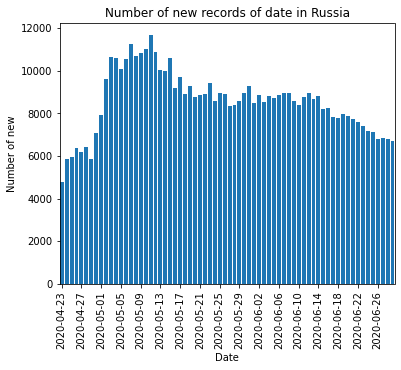

In [ ]:
plt.bar(df['Date'], df['New'], width = 0.8)
useTimeline(df['Date'], round(df['Date'].size/4), '%Y-%m-%d')
plt.title('Number of new records of date in Russia')
plt.xlabel('Date')
plt.ylabel('Number of new')
plt.margins(x = 0)
plt.rcParams["figure.figsize"] = (5, 4.8)
plt.show()